# **Objective: Prediction of Adjusted Passenger Count at an Airport Terminal**
## *Dataset Link: https://www.kaggle.com/rohanshetty678/air-traffic-data*


**1. Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**2. Load the dataset**

In [2]:
dataset=pd.read_csv('/content/air_traffic_data.csv')
df=dataset

**3. Exploratory Data Analysis and Data Preprocessing**

In [3]:
# view the first five rows of the dataset.
dataset.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [4]:
# Last five rows 
dataset.tail()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March
15006,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,10898,Enplaned,10898,2016,March


In [5]:
# size of the data.
dataset.shape

(15007, 16)

In [6]:
# Check for any missing values.
dataset.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [7]:
# The columns "Operating Airline IATA Code" and "Published Airline IATA code" contains 54 null values each.
# As we know IATA code is the abbreviation of an Airline, our dataset contains the name of the published and operating airlines , so we need to worry about missing values in the IATA columns.
# We can drop both the IATA code containing columns without any loss of information.
dataset.drop(['Operating Airline IATA Code','Published Airline IATA Code'],axis=1,inplace=True)

In [8]:
dataset

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,Virgin America,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,Virgin America,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,Virgin America,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [9]:
# Checking for any duplicates and remove if any.
dataset.drop_duplicates()

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,Virgin America,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,Virgin America,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,Virgin America,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


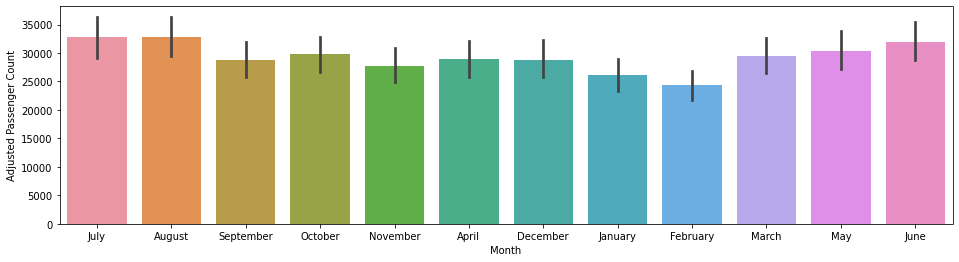

In [10]:
# Montly passenger count.
plt.figure(figsize=(16,4))
sns.barplot(x=dataset['Month'],y=dataset['Adjusted Passenger Count'])

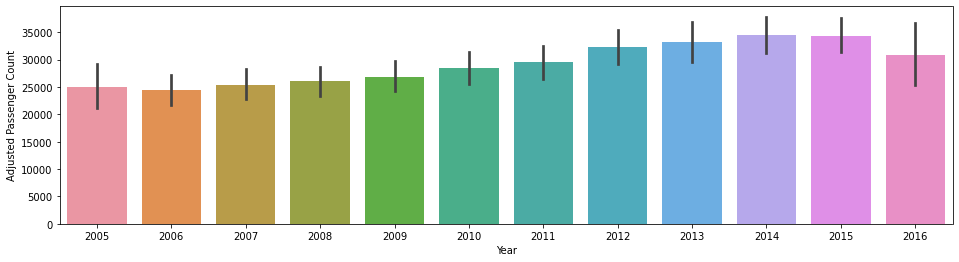

In [11]:
# Yearly Passenger Count.
plt.figure(figsize=(16,4))
sns.barplot(x=dataset['Year'],y=dataset['Adjusted Passenger Count'])

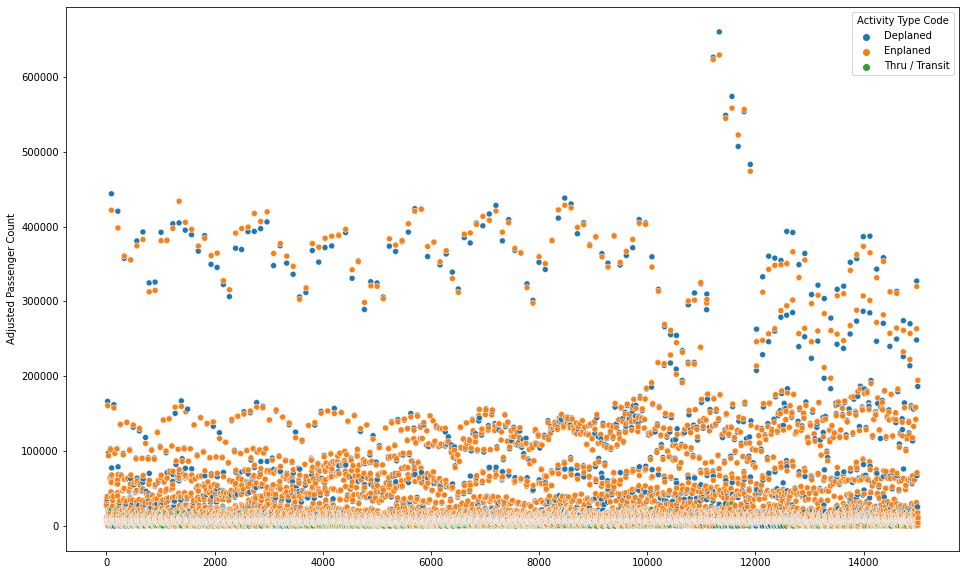

In [12]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=range(0,15007),y=dataset['Adjusted Passenger Count'],hue=dataset['Activity Type Code'])

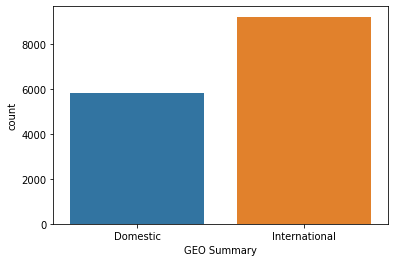

In [13]:
sns.countplot(x=dataset['GEO Summary'])

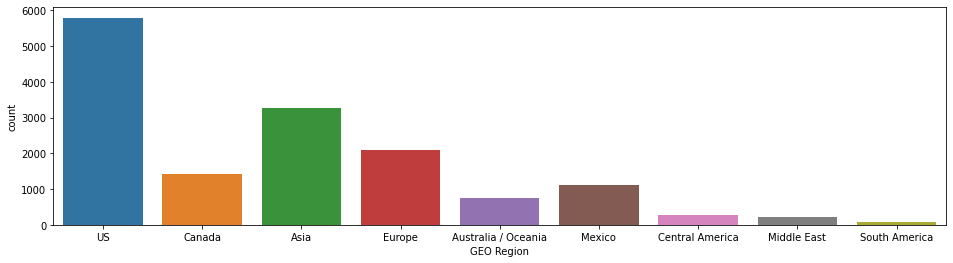

In [14]:
plt.figure(figsize=(16,4))
sns.countplot(x=dataset['GEO Region'])

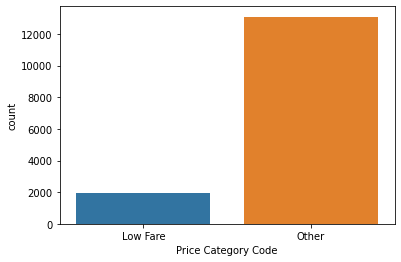

In [15]:
sns.countplot(x=dataset['Price Category Code'])

In [16]:
dataset['Adjusted Passenger Count'].corr(dataset['Passenger Count'])

0.9999408877427276

In [17]:
# As the above two columns are highly correlated , one can be eliminated and we chose 'Passenger Count' to remove as we need to predict the 'Adjusted Passenger count'
dataset.drop(['Passenger Count'],axis=1,inplace=True)
# The 'Activity Period' column data implicitly tells about the year and month , so 'Year' and 'Month' columns can be deleted.
dataset.drop(['Year','Month'],axis=1,inplace=True)

In [18]:
print(dataset[dataset['Activity Type Code']==dataset['Adjusted Activity Type Code']].shape)
print(dataset[dataset['Activity Type Code']=="Thru / Transit"].shape)
print(dataset.shape)

(14087, 11)
(920, 11)
(15007, 11)


*The output of the above cell determines that 'Thru/Transit' in 'Activity Type Code' is same as 'Thru/Transit\*2'.Explicitly the other two categories i.e., enplaned and deplaned are common to both the columns. Hence One among the two can be deleted *

In [19]:
'''*The output of the above cell determines that 'Thru/Transit' in 'Activity Type Code' is same as 'Thru/Transit\*2'.
Explicitly the other two categories i.e., enplaned and deplaned are common to both the columns. Hence One among the two can be deleted '''
dataset.drop(['Activity Type Code'],axis=1,inplace=True)

In [20]:
# Data types of each column
dataset.dtypes

Activity Period                 int64
Operating Airline              object
Published Airline              object
GEO Summary                    object
GEO Region                     object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Adjusted Activity Type Code    object
Adjusted Passenger Count        int64
dtype: object

In [21]:
# After Cleaning the data , the new dimensions of the data.
dataset.shape

(15007, 10)

In [22]:
# Statastical Parameters of the numerical data.
dataset.describe()

,Activity Period,Adjusted Passenger Count
count,15007.000000,15007.000000
mean,201045.073366,29331.917105
std,313.336196,58284.182219
min,200507.000000,1.000000
25%,200803.000000,5495.500000
50%,201011.000000,9354.000000
75%,201308.000000,21182.000000
max,201603.000000,659837.000000


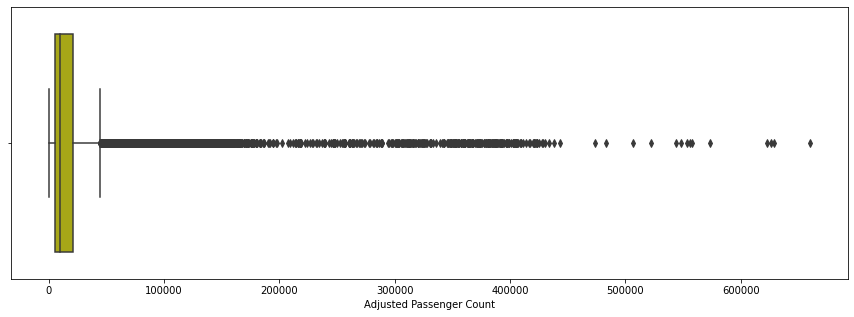

In [23]:
# The max value of 'Adjusted Passenger Count' is much higher than the 75% quartile value. This evidents outliers in the data.
# Visualize using Boxplots to check for outliers existence.
plt.figure(figsize=(15,5))
sns.boxplot(x='Adjusted Passenger Count',data=dataset,orient='h',color='y')

In [24]:
# Outliers are the data points whose z-score value fails to lie between -3 and 3.Below is the code for finding for outliers
def outlierr(data):
  outliers=[]
  threshold=3
  mean=np.mean(data)
  sd=np.std(data)
  
  for i in data:
    z=(i-mean)/sd
    if(np.abs(z)>threshold):
      outliers.append(i)
  return outliers      

In [25]:
outlier=outlierr(dataset['Adjusted Passenger Count'])

In [26]:
outlier

[443656,
 421802,
 420430,
 398135,
 357533,
 360563,
 355551,
 355445,
 380704,
 374221,
 392724,
 382711,
 324729,
 312749,
 325806,
 314628,
 392302,
 381002,
 381246,
 381632,
 403619,
 397549,
 404815,
 433650,
 395122,
 405636,
 388993,
 396292,
 367111,
 373976,
 387762,
 384259,
 349495,
 361206,
 345339,
 364408,
 322569,
 327638,
 306419,
 315514,
 370997,
 391246,
 369304,
 397287,
 393135,
 399207,
 393528,
 417465,
 397134,
 406700,
 406143,
 419569,
 347791,
 363949,
 374340,
 377299,
 351116,
 360460,
 336243,
 346854,
 305902,
 302730,
 311868,
 317942,
 367925,
 377134,
 352456,
 372378,
 371893,
 384334,
 374046,
 387105,
 388797,
 388052,
 391820,
 396295,
 330863,
 342206,
 354222,
 352917,
 289214,
 298619,
 326272,
 320658,
 324641,
 320215,
 305874,
 303663,
 373760,
 383555,
 366632,
 375229,
 379700,
 381242,
 392536,
 403640,
 423758,
 420420,
 423601,
 422989,
 359882,
 373299,
 378838,
 379265,
 348799,
 352889,
 363333,
 367743,
 339147,
 330464,
 316628,
 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'OUTLIERS')

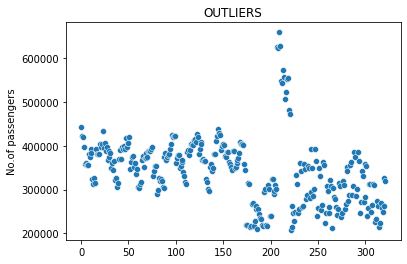

In [27]:
# visualise outliers
x=range(0,322)
y=outlier
sns.scatterplot(x,y)
plt.ylabel('No.of passengers')
plt.title('OUTLIERS')

Text(0.5, 1.0, 'Scatter plot of number of passengers')

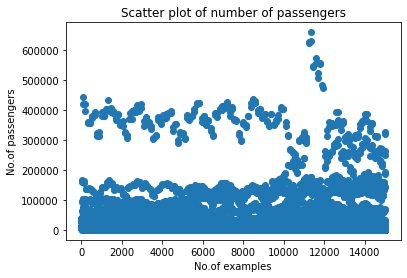

In [28]:
x=range(1,15008)
y=dataset['Adjusted Passenger Count']
plt.scatter(x,y)
plt.xlabel('No.of examples')
plt.ylabel('No.of passengers')
plt.title('Scatter plot of number of passengers')

Text(0, 0.5, 'Number of Airlines')

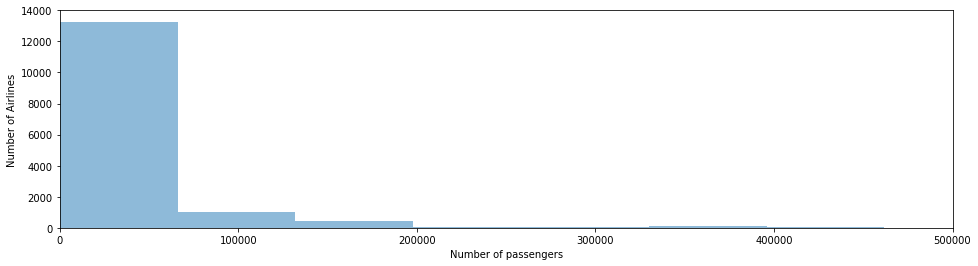

In [29]:
plt.figure(figsize=(16,4))
plt.axis([0, 500000, 0, 14000])
plt.hist(dataset['Adjusted Passenger Count'],alpha=0.5)
plt.xlabel('Number of passengers')
plt.ylabel('Number of Airlines')

In [30]:
# View the outliers
d=dataset[dataset['Adjusted Passenger Count']>=min(outlier)]
d

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code,Adjusted Passenger Count
93,200507,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,Domestic,US,Other,Terminal 3,F,Deplaned,443656
94,200507,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,Domestic,US,Other,Terminal 3,F,Enplaned,421802
212,200508,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,Domestic,US,Other,Terminal 3,F,Deplaned,420430
213,200508,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,Domestic,US,Other,Terminal 3,F,Enplaned,398135
330,200509,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,Domestic,US,Other,Terminal 3,F,Deplaned,357533
...,...,...,...,...,...,...,...,...,...,...
14859,201602,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Enplaned,257190
14979,201603,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,E,Deplaned,248521
14980,201603,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,E,Enplaned,263407
14982,201603,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Deplaned,327187


In [31]:
dataset.quantile(1)

Activity Period             201603.0
Adjusted Passenger Count    659837.0
Name: 1, dtype: float64

In [32]:
# We can notice that most examples in the outliers are from 'United Airlines',let's confirm it by visualising
d[d['Operating Airline']=='United Airlines']

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code,Adjusted Passenger Count
10198,201210,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Deplaned,218215
10199,201210,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Enplaned,218261
10312,201211,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Deplaned,214589
10313,201211,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Enplaned,216903
10428,201212,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Deplaned,217757
...,...,...,...,...,...,...,...,...,...,...
14859,201602,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Enplaned,257190
14979,201603,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,E,Deplaned,248521
14980,201603,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,E,Enplaned,263407
14982,201603,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Deplaned,327187


In [33]:
d[d['Operating Airline']!='United Airlines']

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code,Adjusted Passenger Count
93,200507,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,Domestic,US,Other,Terminal 3,F,Deplaned,443656
94,200507,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,Domestic,US,Other,Terminal 3,F,Enplaned,421802
212,200508,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,Domestic,US,Other,Terminal 3,F,Deplaned,420430
213,200508,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,Domestic,US,Other,Terminal 3,F,Enplaned,398135
330,200509,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,Domestic,US,Other,Terminal 3,F,Deplaned,357533
...,...,...,...,...,...,...,...,...,...,...
10874,201304,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,Domestic,US,Other,Terminal 3,F,Enplaned,301722
10989,201305,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,Domestic,US,Other,Terminal 3,F,Deplaned,323476
10990,201305,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,Domestic,US,Other,Terminal 3,F,Enplaned,325203
11101,201306,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,Domestic,US,Other,Terminal 3,F,Deplaned,309798


**Important Insight: All the 322 outliers are from United Airlines. This explicitly tells us that these outliers cannot be treated as anamoly in data. This evidents that United Airlines has abnormally highest capacity**

In [34]:
dataset[(dataset['Operating Airline']=='United Airlines') & (dataset['Boarding Area']=='F')]

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code,Adjusted Passenger Count
8231,201105,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Deplaned,54487
8232,201105,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Enplaned,53997
8349,201106,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Deplaned,78131
8350,201106,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Enplaned,81444
8466,201107,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Deplaned,85262
...,...,...,...,...,...,...,...,...,...,...
14983,201603,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Enplaned,319873
14984,201603,United Airlines,United Airlines,Domestic,US,Other,Terminal 3,F,Thru / Transit * 2,78
14993,201603,United Airlines,United Airlines,International,Canada,Other,Terminal 3,F,Deplaned,4388
14994,201603,United Airlines,United Airlines,International,Canada,Other,Terminal 3,F,Enplaned,9378


**Though removing this outliers or handling them by converting into new values is not good method to practise,but as we first want to fit this model to LINEAR REGRESSION , we need to get rid of outliers to have better performance**

In [35]:
# Finding lower and upper quartiles
l=dataset['Adjusted Passenger Count'].quantile(0.25)
u=dataset['Adjusted Passenger Count'].quantile(0.75)
iqr=u-l
l=l-(1.5*iqr)
u=u+(1.5*iqr)

In [36]:
print(l,u)

-18034.25 44711.75


In [37]:
dataset['Adjusted Passenger Count'].min()

1

In [38]:
# Capping of outliers.
for i in range(0,15007):
  if (dataset['Adjusted Passenger Count'][i]>u):
    dataset['Adjusted Passenger Count'][i]=u
    if (dataset['Adjusted Passenger Count'][i]<l):
      dataset['Adjusted Passenger Count'][i]=l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


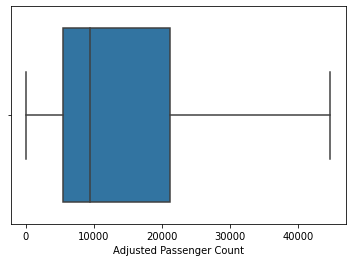

In [39]:
sns.boxplot(x=dataset['Adjusted Passenger Count'])

**Converting Categorical Variables to Numeric**

In [40]:
dataset

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code,Adjusted Passenger Count
0,200507,ATA Airlines,ATA Airlines,Domestic,US,Low Fare,Terminal 1,B,Deplaned,27271
1,200507,ATA Airlines,ATA Airlines,Domestic,US,Low Fare,Terminal 1,B,Enplaned,29131
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Low Fare,Terminal 1,B,Thru / Transit * 2,10830
3,200507,Air Canada,Air Canada,International,Canada,Other,Terminal 1,B,Deplaned,35156
4,200507,Air Canada,Air Canada,International,Canada,Other,Terminal 1,B,Enplaned,34090
...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,Virgin America,Domestic,US,Low Fare,Terminal 2,D,Enplaned,44711
15003,201603,Virgin America,Virgin America,International,Mexico,Low Fare,International,A,Deplaned,4189
15004,201603,Virgin America,Virgin America,International,Mexico,Low Fare,Terminal 2,D,Enplaned,4693
15005,201603,Virgin Atlantic,Virgin Atlantic,International,Europe,Other,International,A,Deplaned,12313


In [41]:
dataset.columns

Index(['Activity Period', 'Operating Airline', 'Published Airline',
       'GEO Summary', 'GEO Region', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count'],
      dtype='object')

In [42]:
# Storing independent variables in x and dependent variables in y.
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1].values
x

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code
0,200507,ATA Airlines,ATA Airlines,Domestic,US,Low Fare,Terminal 1,B,Deplaned
1,200507,ATA Airlines,ATA Airlines,Domestic,US,Low Fare,Terminal 1,B,Enplaned
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Low Fare,Terminal 1,B,Thru / Transit * 2
3,200507,Air Canada,Air Canada,International,Canada,Other,Terminal 1,B,Deplaned
4,200507,Air Canada,Air Canada,International,Canada,Other,Terminal 1,B,Enplaned
...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,Virgin America,Domestic,US,Low Fare,Terminal 2,D,Enplaned
15003,201603,Virgin America,Virgin America,International,Mexico,Low Fare,International,A,Deplaned
15004,201603,Virgin America,Virgin America,International,Mexico,Low Fare,Terminal 2,D,Enplaned
15005,201603,Virgin Atlantic,Virgin Atlantic,International,Europe,Other,International,A,Deplaned


In [43]:
# split the data into training set and test set in 4:1 ratio.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [44]:
# Converting categorical columns into numerical using label encoding
from sklearn.preprocessing import LabelEncoder
le_GS=LabelEncoder()
le_Price=LabelEncoder()
x_train['GEO Summary']=le_GS.fit_transform(x_train.iloc[:,3])
x_train['Price Category Code']=le_Price.fit_transform(x_train.iloc[:,5])
x_test['GEO Summary']=le_GS.fit_transform(x_test.iloc[:,3])
x_test['Price Category Code']=le_Price.fit_transform(x_test.iloc[:,5])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [45]:
x_train

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code
13750,201505,United Airlines,United Airlines,0,US,1,Terminal 3,E,Deplaned
14344,201510,SkyWest Airlines,United Airlines,0,US,1,Terminal 3,F,Deplaned
8504,201108,Air Canada,Air Canada,1,Canada,1,International,G,Deplaned
2643,200706,Air China,Air China,1,Asia,1,International,G,Enplaned
8568,201108,SkyWest Airlines,United Airlines - Pre 07/01/2013,0,US,1,Terminal 3,F,Deplaned
...,...,...,...,...,...,...,...,...,...
905,200602,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,1,Asia,1,International,G,Thru / Transit * 2
5192,200903,Lufthansa German Airlines,Lufthansa German Airlines,1,Europe,1,International,G,Enplaned
12172,201404,Alaska Airlines,Alaska Airlines,0,US,1,Terminal 1,B,Enplaned
235,200509,ATA Airlines,ATA Airlines,0,US,0,Terminal 1,B,Thru / Transit * 2


In [46]:
# One Hot Encoding
columns=['Operating Airline', 'Published Airline', 'GEO Region', 'Terminal','Boarding Area', 'Adjusted Activity Type Code']

In [47]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
enc.fit(x_train[columns])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [48]:
a=enc.transform(x_train[columns])
a

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [49]:
x_train=x_train.values

In [50]:
x_train

array([[201505, 'United Airlines', 'United Airlines', ..., 'Terminal 3',
        'E', 'Deplaned'],
       [201510, 'SkyWest Airlines', 'United Airlines', ..., 'Terminal 3',
        'F', 'Deplaned'],
       [201108, 'Air Canada ', 'Air Canada ', ..., 'International', 'G',
        'Deplaned'],
       ...,
       [201404, 'Alaska Airlines', 'Alaska Airlines', ..., 'Terminal 1',
        'B', 'Enplaned'],
       [200509, 'ATA Airlines', 'ATA Airlines', ..., 'Terminal 1', 'B',
        'Thru / Transit * 2'],
       [201502, 'Japan Airlines', 'Japan Airlines', ..., 'International',
        'A', 'Enplaned']], dtype=object)

In [51]:
b=enc.transform(x_test[columns])
b

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [52]:
x_train=np.concatenate((x_train,a),1)

In [53]:
x_train

array([[201505, 'United Airlines', 'United Airlines', ..., 1.0, 0.0, 0.0],
       [201510, 'SkyWest Airlines', 'United Airlines', ..., 1.0, 0.0,
        0.0],
       [201108, 'Air Canada ', 'Air Canada ', ..., 1.0, 0.0, 0.0],
       ...,
       [201404, 'Alaska Airlines', 'Alaska Airlines', ..., 0.0, 1.0, 0.0],
       [200509, 'ATA Airlines', 'ATA Airlines', ..., 0.0, 0.0, 1.0],
       [201502, 'Japan Airlines', 'Japan Airlines', ..., 0.0, 1.0, 0.0]],
      dtype=object)

In [54]:
pd.DataFrame(x_train).isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
174    0
175    0
176    0
177    0
178    0
Length: 179, dtype: int64

In [55]:
x_test=np.concatenate((x_test,b),1)

In [56]:
x_test

array([[201311, 'Air France', 'Air France', ..., 1.0, 0.0, 0.0],
       [201312, 'Air New Zealand', 'Air New Zealand', ..., 1.0, 0.0, 0.0],
       [201206, 'United Airlines - Pre 07/01/2013',
        'United Airlines - Pre 07/01/2013', ..., 0.0, 0.0, 1.0],
       ...,
       [201101, 'United Airlines - Pre 07/01/2013',
        'United Airlines - Pre 07/01/2013', ..., 0.0, 0.0, 1.0],
       [200802, 'Hawaiian Airlines', 'Hawaiian Airlines', ..., 0.0, 1.0,
        0.0],
       [201004, 'United Airlines - Pre 07/01/2013',
        'United Airlines - Pre 07/01/2013', ..., 0.0, 1.0, 0.0]],
      dtype=object)

In [57]:
x_train=pd.DataFrame(x_train)

In [58]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
0,201505,United Airlines,United Airlines,0,US,1,Terminal 3,E,Deplaned,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,201510,SkyWest Airlines,United Airlines,0,US,1,Terminal 3,F,Deplaned,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,201108,Air Canada,Air Canada,1,Canada,1,International,G,Deplaned,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,200706,Air China,Air China,1,Asia,1,International,G,Enplaned,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,201108,SkyWest Airlines,United Airlines - Pre 07/01/2013,0,US,1,Terminal 3,F,Deplaned,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12000,200602,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,1,Asia,1,International,G,Thru / Transit * 2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
12001,200903,Lufthansa German Airlines,Lufthansa German Airlines,1,Europe,1,International,G,Enplaned,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
12002,201404,Alaska Airlines,Alaska Airlines,0,US,1,Terminal 1,B,Enplaned,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
12003,200509,ATA Airlines,ATA Airlines,0,US,0,Terminal 1,B,Thru / Transit * 2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [59]:
x_train=x_train.drop(columns=[1,2,4,6,7,8],axis=1)

In [60]:
x_test=pd.DataFrame(x_test)

In [61]:
x_test=x_test.drop(columns=[1,2,4,6,7,8],axis=1)

In [62]:
x_test=x_test.values

In [63]:
x_train=x_train.values

In [64]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [65]:
y_pred

array([11962.30161108,  7767.63022882,  3857.81691214, ...,
        7354.19066541, 16313.60478006, 26289.94242562])

# **Model Performance_Linear Regression**

In [66]:
# MSE
from sklearn.metrics import  mean_squared_error
Linear_Regression=mean_squared_error(y_pred,y_test)

In [67]:
# r2_score
from sklearn.metrics import r2_score 
r2_score_Linear_Regressionr=r2_score(y_test, y_pred) 